<a href="https://colab.research.google.com/github/rosariopodesta/rosariopodesta.github.io/blob/master/TareaPython(Pasman-Podesta).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
import numpy as np

In [3]:
import io

In [5]:
from google.colab import files
uploaded = files.upload()

Saving base_tarea.xls to base_tarea.xls


In [6]:
#defino la base
baset= pd.read_excel('base_tarea.xls')

In [7]:
#1 
baset.head()


,Year,ID,Name,State,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
0,2013,103381,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,56004,10,22392,2003-06-17
1,2013,103404,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,28807,18,28447,2005-09-21
2,2013,100759,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,1440115,183,474784,2001-01-13
3,2013,103246,Bear Creek,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,87587,13,29193,2006-01-03
4,2013,103451,Knight Mine,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,147499,27,46393,2007-05-21


In [8]:
baset.tail()


,Year,ID,Name,State,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
1445,2013,1103254,Fidelity Mine,Refuse Recovery,Perry,"Active, men working, not producing",Refuse,Operating Subsidiary,18532,4,8249,2006-02-05
1446,2013,1102636,Wfi,Refuse Recovery,Saline,"Active, men working, not producing",Refuse,Indepedent Producer Operator,5070,4,1449,2007-02-07
1447,2013,4407233,Gobco #8,Refuse Recovery,Russell,Active,Refuse,Indepedent Producer Operator,377607,16,43684,2002-08-17
1448,2013,1518524,Turkey Pen Refuse,Refuse Recovery,Pike,Active,Refuse,Indepedent Producer Operator,7744,2,622,2002-08-16
1449,2013,1519685,Fedscreek Refuse Pile,Refuse Recovery,Pike,"Active, men working, not producing",Refuse,Indepedent Producer Operator,17357,3,1020,2005-09-28


In [9]:
#2
baset.dtypes


Year                          int64
ID                            int64
Name                         object
State                        object
County                       object
Status                       object
Type                         object
Company Type                 object
Production                    int64
Average Employees             int64
Labor_Hours                   int64
date                 datetime64[ns]
dtype: object

In [10]:
#3
basetcols=pd.read_excel('base_tarea.xls', 
                            usecols=["State", "Status", "Production"])

In [11]:
print(basetcols)

                State                              Status  Production
0             Alabama  Active, men working, not producing       56004
1             Alabama               Permanently abandoned       28807
2             Alabama  Active, men working, not producing     1440115
3             Alabama                              Active       87587
4             Alabama                              Active      147499
...               ...                                 ...         ...
1445  Refuse Recovery  Active, men working, not producing       18532
1446  Refuse Recovery  Active, men working, not producing        5070
1447  Refuse Recovery                              Active      377607
1448  Refuse Recovery                              Active        7744
1449  Refuse Recovery  Active, men working, not producing       17357

[1450 rows x 3 columns]


In [12]:
#4
baset["Production"].describe()

count    1.450000e+03
mean     6.792012e+05
std      4.414922e+06
min      0.000000e+00
25%      0.000000e+00
50%      3.060650e+04
75%      2.514752e+05
max      1.110055e+08
Name: Production, dtype: float64

In [13]:
#5
basetcolw=(baset.insert(5,"column1",np.nan))


In [14]:
#6
newdtframe= pd.read_excel('base_tarea.xls',skiprows=10)

In [15]:
newdtframe

,2013,102901,Shoal Creek Mine,Alabama,Jefferson,Active,Underground,Indepedent Producer Operator,1453024,571,1237415,2002-08-16 00:00:00
0,2013,103180,Sloan Mountain Mine,Alabama,Jefferson,Active,Surface,Indepedent Producer Operator,327780,84,196963,2005-09-28
1,2013,103182,Fishtrap,Alabama,Jefferson,Active,Surface,Operating Subsidiary,175058,30,87314,2005-09-30
2,2013,103285,Narley Mine,Alabama,Jefferson,Active,Surface,Operating Subsidiary,154861,39,90584,2006-03-07
3,2013,103332,Powhatan Mine,Alabama,Jefferson,Active,Surface,Indepedent Producer Operator,140521,27,61394,2007-12-07
4,2013,103375,Johnson Mine,Alabama,Jefferson,Temporarily closed,Surface,Indepedent Producer Operator,580,2,1900,2002-12-07
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,2013,1103254,Fidelity Mine,Refuse Recovery,Perry,"Active, men working, not producing",Refuse,Operating Subsidiary,18532,4,8249,2006-02-05
1436,2013,1102636,Wfi,Refuse Recovery,Saline,"Active, men working, not producing",Refuse,Indepedent Producer Operator,5070,4,1449,2007-02-07
1437,2013,4407233,Gobco #8,Refuse Recovery,Russell,Active,Refuse,Indepedent Producer Operator,377607,16,43684,2002-08-17
1438,2013,1518524,Turkey Pen Refuse,Refuse Recovery,Pike,Active,Refuse,Indepedent Producer Operator,7744,2,622,2002-08-16


In [16]:
#7
filaprod=baset["Production"].sum()


In [17]:
filaprod1={'Total_Production':[filaprod]}

In [18]:
pd.DataFrame(data=filaprod1).T

,0
Total_Production,984841779


In [19]:
baset.reindex(filaprod1,fill_value=filaprod,copy=True)

,Year,ID,Name,State,County,column1,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
Total_Production,984841779,984841779,984841779,984841779,984841779,984841779.0,984841779,984841779,984841779,984841779,984841779,984841779,984841779


In [21]:
filaempl=baset["Labor_Hours"].sum()



In [22]:
filaempl1={'Total_Labor_Hours':[filaempl]}

In [ ]:
pd.DataFrame(data=filaempl1).T

,0
Total_Labor_Hours,177910757


In [ ]:
baset.reindex(filaempl1,fill_value=filaempl,copy=True)

,Year,ID,Name,State,County,column1,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
Total_Labor_Hours,177910757,177910757,177910757,177910757,177910757,177910757.0,177910757,177910757,177910757,177910757,177910757,177910757,177910757


In [28]:
#8
First_Ten=baset.head(n=10)

In [29]:
First_Ten

,Year,ID,Name,State,County,column1,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
0,2013,103381,Tacoa Highwall Miner,Alabama,Bibb,NaN,"Active, men working, not producing",Surface,Indepedent Producer Operator,56004,10,22392,2003-06-17
1,2013,103404,Reid School Mine,Alabama,Blount,NaN,Permanently abandoned,Surface,Indepedent Producer Operator,28807,18,28447,2005-09-21
2,2013,100759,North River #1 Underground Min,Alabama,Fayette,NaN,"Active, men working, not producing",Underground,Indepedent Producer Operator,1440115,183,474784,2001-01-13
3,2013,103246,Bear Creek,Alabama,Franklin,NaN,Active,Surface,Indepedent Producer Operator,87587,13,29193,2006-01-03
4,2013,103451,Knight Mine,Alabama,Franklin,NaN,Active,Surface,Indepedent Producer Operator,147499,27,46393,2007-05-21
5,2013,103433,Crane Central Mine,Alabama,Jackson,NaN,Temporarily closed,Surface,Indepedent Producer Operator,69339,27,47195,2005-06-25
6,2013,100329,Concord Mine,Alabama,Jefferson,NaN,Active,Underground,Operating Subsidiary,0,59,144002,2006-02-05
7,2013,100851,Oak Grove Mine,Alabama,Jefferson,NaN,Active,Underground,Operating Subsidiary,2269014,447,1001809,2007-02-07
8,2013,102901,Shoal Creek Mine,Alabama,Jefferson,NaN,Active,Surface,Indepedent Producer Operator,0,5,12396,2002-08-17
9,2013,102901,Shoal Creek Mine,Alabama,Jefferson,NaN,Active,Underground,Indepedent Producer Operator,1453024,571,1237415,2002-08-16


In [30]:
#9
baset["Labor_Hours"].groupby(baset["ID"]).sum()

ID
100329      144002
100347      215295
100515        6240
100759      474784
100851     1001809
            ...   
4801353    2811138
4801429     161270
4801645      35687
4801646     661265
5000030     286079
Name: Labor_Hours, Length: 1321, dtype: int64

In [31]:
#10
baset.loc[977]

Year                                         2013
ID                                        4406907
Name                                   Mine No. 1
State                                    Virginia
County                                   Buchanan
column1                                       NaN
Status                         Temporarily closed
Type                                  Underground
Company Type         Indepedent Producer Operator
Production                                  32968
Average Employees                              20
Labor_Hours                                 28511
date                          2007-05-21 00:00:00
Name: 977, dtype: object

In [32]:
#11

baset[baset.Labor_Hours>25000]

,Year,ID,Name,State,County,column1,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
1,2013,103404,Reid School Mine,Alabama,Blount,NaN,Permanently abandoned,Surface,Indepedent Producer Operator,28807,18,28447,2005-09-21
2,2013,100759,North River #1 Underground Min,Alabama,Fayette,NaN,"Active, men working, not producing",Underground,Indepedent Producer Operator,1440115,183,474784,2001-01-13
3,2013,103246,Bear Creek,Alabama,Franklin,NaN,Active,Surface,Indepedent Producer Operator,87587,13,29193,2006-01-03
4,2013,103451,Knight Mine,Alabama,Franklin,NaN,Active,Surface,Indepedent Producer Operator,147499,27,46393,2007-05-21
5,2013,103433,Crane Central Mine,Alabama,Jackson,NaN,Temporarily closed,Surface,Indepedent Producer Operator,69339,27,47195,2005-06-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,2013,4800677,Jim Bridger Mine,Wyoming,Sweetwater,NaN,Active,Surface,Operating Subsidiary,785984,182,368307,2005-07-24
1419,2013,4801180,Black Butte And Leucite Hills,Wyoming,Sweetwater,NaN,Active,Surface,Operating Subsidiary,3657036,186,386879,2006-11-15
1420,2013,4801646,Bridger Underground Coal Mine,Wyoming,Sweetwater,NaN,Active,Underground,Operating Subsidiary,4442616,278,661265,2003-06-17
1428,2013,3603561,Mcclure Strip,Refuse Recovery,Jefferson,NaN,Active,Refuse,Indepedent Producer Operator,235642,51,121332,2002-08-17


In [33]:
#12
baset.isin(['Russell','Active'])


,Year,ID,Name,State,County,column1,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,False,False,False,False,False,False,False,False,False,False,False,False,False
1446,False,False,False,False,False,False,False,False,False,False,False,False,False
1447,False,False,False,False,True,False,True,False,False,False,False,False,False
1448,False,False,False,False,False,False,True,False,False,False,False,False,False


In [34]:
#13
baset.sort_values(by="Labor_Hours")

,Year,ID,Name,State,County,column1,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
837,2013,3608140,Bell Corp,Pennsylvania (Anthracite),Schuylkill,NaN,Temporarily closed,Surface,Indepedent Producer Operator,23,2,35,2005-09-21
213,2013,1519619,No. 1 Auger,Kentucky (East),Floyd,NaN,Temporarily closed,Surface,Indepedent Producer Operator,700,3,40,2005-07-24
1437,2013,3610027,Paradise Bank,Refuse Recovery,Northumberland,NaN,"New, under construction",Refuse,Indepedent Producer Operator,52,1,53,2005-07-24
740,2013,3609189,Ser #3163,Pennsylvania (Bituminous),Indiana,NaN,Active,Surface,Indepedent Producer Operator,574,1,54,2001-01-13
1433,2013,1519554,No 1,Refuse Recovery,Harlan,NaN,Permanently abandoned,Refuse,Indepedent Producer Operator,8586,1,133,2007-12-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,2013,4601437,Mcelroy Mine,West Virginia (Northern),Marshall,NaN,Active,Underground,Operating Subsidiary,9403070,957,2194378,2007-02-07
25,2013,101401,No 7 Mine,Alabama,Tuscaloosa,NaN,Active,Underground,Operating Subsidiary,5405412,989,2464719,2005-06-25
1413,2013,4801353,North Antelope Rochelle Mine,Wyoming,Campbell,NaN,Active,Surface,Operating Subsidiary,111005549,1349,2811138,2006-03-07
711,2013,3607230,Bailey Mine,Pennsylvania (Bituminous),Greene,NaN,Active,Underground,Operating Subsidiary,11321481,1222,3015772,2005-09-30


In [35]:
#14
fecha1=baset[baset.date > '31/01/2005']


In [ ]:
fecha1

,Year,ID,Name,State,County,column1,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
1,2013,103404,Reid School Mine,Alabama,Blount,NaN,Permanently abandoned,Surface,Indepedent Producer Operator,28807,18,28447,2005-09-21
3,2013,103246,Bear Creek,Alabama,Franklin,NaN,Active,Surface,Indepedent Producer Operator,87587,13,29193,2006-01-03
4,2013,103451,Knight Mine,Alabama,Franklin,NaN,Active,Surface,Indepedent Producer Operator,147499,27,46393,2007-05-21
5,2013,103433,Crane Central Mine,Alabama,Jackson,NaN,Temporarily closed,Surface,Indepedent Producer Operator,69339,27,47195,2005-06-25
6,2013,100329,Concord Mine,Alabama,Jefferson,NaN,Active,Underground,Operating Subsidiary,0,59,144002,2006-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,2013,1518401,No. 1,Refuse Recovery,Letcher,NaN,Temporarily closed,Refuse,Indepedent Producer Operator,94748,4,6337,2007-05-21
1444,2013,1519713,# 1 Refuse,Refuse Recovery,Letcher,NaN,"Active, men working, not producing",Refuse,Indepedent Producer Operator,1879,2,200,2005-06-25
1445,2013,1103254,Fidelity Mine,Refuse Recovery,Perry,NaN,"Active, men working, not producing",Refuse,Operating Subsidiary,18532,4,8249,2006-02-05
1446,2013,1102636,Wfi,Refuse Recovery,Saline,NaN,"Active, men working, not producing",Refuse,Indepedent Producer Operator,5070,4,1449,2007-02-07


In [36]:
fecha2=fecha1[fecha1.date < '01/12/2006']

In [37]:
fecha2

,Year,ID,Name,State,County,column1,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
1,2013,103404,Reid School Mine,Alabama,Blount,NaN,Permanently abandoned,Surface,Indepedent Producer Operator,28807,18,28447,2005-09-21
3,2013,103246,Bear Creek,Alabama,Franklin,NaN,Active,Surface,Indepedent Producer Operator,87587,13,29193,2006-01-03
5,2013,103433,Crane Central Mine,Alabama,Jackson,NaN,Temporarily closed,Surface,Indepedent Producer Operator,69339,27,47195,2005-06-25
10,2013,103180,Sloan Mountain Mine,Alabama,Jefferson,NaN,Active,Surface,Indepedent Producer Operator,327780,84,196963,2005-09-28
11,2013,103182,Fishtrap,Alabama,Jefferson,NaN,Active,Surface,Operating Subsidiary,175058,30,87314,2005-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,2013,3610027,Paradise Bank,Refuse Recovery,Northumberland,NaN,"New, under construction",Refuse,Indepedent Producer Operator,52,1,53,2005-07-24
1440,2013,3609405,Phoenix,Refuse Recovery,Washington,NaN,Active,Refuse,Indepedent Producer Operator,4473,5,5670,2005-09-21
1442,2013,3609337,Marco Gfcc Project,Refuse Recovery,Westmoreland,NaN,Active,Refuse,Indepedent Producer Operator,6809,4,5175,2006-01-03
1444,2013,1519713,# 1 Refuse,Refuse Recovery,Letcher,NaN,"Active, men working, not producing",Refuse,Indepedent Producer Operator,1879,2,200,2005-06-25


In [50]:
#15 
baset.set_index(baset["date"]['01/01/2005':'31/12/2005'])

TypeError: ignored

In [ ]:
#16  
baset.sort_values(by=['ID','date'],ascending=[0,1])

,Year,ID,Name,State,County,column1,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
48,2013,5000030,Usibelli,Alaska,Fairbanks North Star,NaN,Active,Surface,Indepedent Producer Operator,1631584,125,286079,2002-08-17
1420,2013,4801646,Bridger Underground Coal Mine,Wyoming,Sweetwater,NaN,Active,Underground,Operating Subsidiary,4442616,278,661265,2003-06-17
61,2013,4801645,Addcar System 18 Hwm Serial No,Colorado,Rio Blanco,NaN,Active,Surface,Indepedent Producer Operator,350060,17,35687,2001-01-13
1414,2013,4801429,Dry Fork Mine,Wyoming,Campbell,NaN,Active,Surface,Operating Subsidiary,5433936,78,161270,2007-12-07
1413,2013,4801353,North Antelope Rochelle Mine,Wyoming,Campbell,NaN,Active,Surface,Operating Subsidiary,111005549,1349,2811138,2006-03-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2013,100851,Oak Grove Mine,Alabama,Jefferson,NaN,Active,Underground,Operating Subsidiary,2269014,447,1001809,2007-02-07
2,2013,100759,North River #1 Underground Min,Alabama,Fayette,NaN,"Active, men working, not producing",Underground,Indepedent Producer Operator,1440115,183,474784,2001-01-13
1441,2013,100515,Mary Lee # 1 Mine,Refuse Recovery,Walker,NaN,"Active, men working, not producing",Refuse,Indepedent Producer Operator,8400,4,6240,2001-01-13
32,2013,100347,Choctaw Mine,Alabama,Walker,NaN,Active,Surface,Indepedent Producer Operator,537429,82,215295,2006-03-07


In [ ]:
#17
newbaset=pd.concat([baset,baset,baset])

In [ ]:
newbaset

,Year,ID,Name,State,County,column1,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
0,2013,103381,Tacoa Highwall Miner,Alabama,Bibb,NaN,"Active, men working, not producing",Surface,Indepedent Producer Operator,56004,10,22392,2003-06-17
1,2013,103404,Reid School Mine,Alabama,Blount,NaN,Permanently abandoned,Surface,Indepedent Producer Operator,28807,18,28447,2005-09-21
2,2013,100759,North River #1 Underground Min,Alabama,Fayette,NaN,"Active, men working, not producing",Underground,Indepedent Producer Operator,1440115,183,474784,2001-01-13
3,2013,103246,Bear Creek,Alabama,Franklin,NaN,Active,Surface,Indepedent Producer Operator,87587,13,29193,2006-01-03
4,2013,103451,Knight Mine,Alabama,Franklin,NaN,Active,Surface,Indepedent Producer Operator,147499,27,46393,2007-05-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,2013,1103254,Fidelity Mine,Refuse Recovery,Perry,NaN,"Active, men working, not producing",Refuse,Operating Subsidiary,18532,4,8249,2006-02-05
1446,2013,1102636,Wfi,Refuse Recovery,Saline,NaN,"Active, men working, not producing",Refuse,Indepedent Producer Operator,5070,4,1449,2007-02-07
1447,2013,4407233,Gobco #8,Refuse Recovery,Russell,NaN,Active,Refuse,Indepedent Producer Operator,377607,16,43684,2002-08-17
1448,2013,1518524,Turkey Pen Refuse,Refuse Recovery,Pike,NaN,Active,Refuse,Indepedent Producer Operator,7744,2,622,2002-08-16


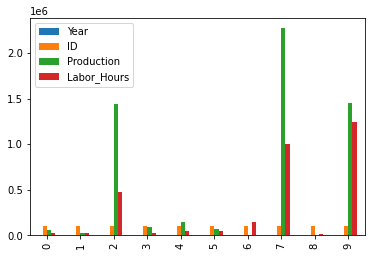

In [ ]:
#18
import matplotlib.pyplot as plt
First_Ten.plot(y=["Year","ID","Production","Labor_Hours"],kind='bar')

In [ ]:
#19
baseplot2=baset.sort_values(by="Production")

In [ ]:
baseplot2

,Year,ID,Name,State,County,column1,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
724,2013,3608222,Homer City Generating Station,Pennsylvania (Bituminous),Indiana,NaN,Active,Surface,Indepedent Producer Operator,0,1,3906,2005-06-25
1016,2013,4404296,Gardner Load Out,Virginia,Russell,NaN,"Active, men working, not producing",Surface,Operating Subsidiary,0,2,4391,2007-05-21
1017,2013,4404296,Gardner Load Out,Virginia,Russell,NaN,"Active, men working, not producing",Underground,Operating Subsidiary,0,1,2067,2005-06-25
313,2013,1516577,Mill Creek Prep Plant,Kentucky (East),Letcher,NaN,Active,Underground,Operating Subsidiary,0,11,40093,2001-01-13
312,2013,1511121,Roxana Prep Plant,Kentucky (East),Letcher,NaN,Active,Underground,Operating Subsidiary,0,32,60389,2005-09-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,2013,4801078,Eagle Butte Mine,Wyoming,Campbell,NaN,Active,Surface,Operating Subsidiary,19904433,255,555161,2002-08-16
1415,2013,4801337,Antelope Coal Mine,Wyoming,Converse,NaN,Active,Surface,Operating Subsidiary,31354248,556,1155976,2002-12-07
1407,2013,4800992,Cordero Mine,Wyoming,Campbell,NaN,Active,Surface,Operating Subsidiary,36670450,654,1369602,2006-02-05
1406,2013,4800977,Black Thunder,Wyoming,Campbell,NaN,Active,Surface,Operating Subsidiary,100687876,1585,3206295,2005-06-25


In [ ]:
baseplot3=baseplot2.tail(n=10)

In [ ]:
baseplot3

,Year,ID,Name,State,County,column1,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
545,2013,3200595,Freedom Mine,North Dakota,Mercer,NaN,Active,Surface,Operating Subsidiary,13782716,477,943102,2006-11-15
1408,2013,4800993,Rawhide Mine,Wyoming,Campbell,NaN,Active,Surface,Operating Subsidiary,14246329,210,419332,2007-02-07
1411,2013,4801200,Buckskin Mine,Wyoming,Campbell,NaN,Active,Surface,Indepedent Producer Operator,15023906,343,690700,2005-09-28
535,2013,2401457,Spring Creek Coal Company,Montana,Big Horn,NaN,Active,Surface,Operating Subsidiary,17669717,267,556967,2002-08-17
1405,2013,4800732,Belle Ayr Mine,Wyoming,Campbell,NaN,Active,Surface,Operating Subsidiary,18258922,301,660242,2007-05-21
1410,2013,4801078,Eagle Butte Mine,Wyoming,Campbell,NaN,Active,Surface,Operating Subsidiary,19904433,255,555161,2002-08-16
1415,2013,4801337,Antelope Coal Mine,Wyoming,Converse,NaN,Active,Surface,Operating Subsidiary,31354248,556,1155976,2002-12-07
1407,2013,4800992,Cordero Mine,Wyoming,Campbell,NaN,Active,Surface,Operating Subsidiary,36670450,654,1369602,2006-02-05
1406,2013,4800977,Black Thunder,Wyoming,Campbell,NaN,Active,Surface,Operating Subsidiary,100687876,1585,3206295,2005-06-25
1413,2013,4801353,North Antelope Rochelle Mine,Wyoming,Campbell,NaN,Active,Surface,Operating Subsidiary,111005549,1349,2811138,2006-03-07


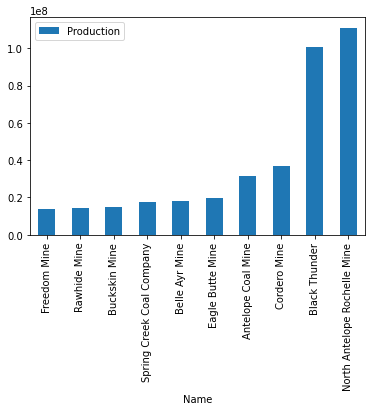

In [ ]:
baseplot3.plot(x="Name",y="Production",kind='bar')